In [1]:
from sklearn.preprocessing import Normalizer
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from model import GGNN
import torch.nn as nn
import time
import sys
from tqdm import tqdm
from model import Utils
from model import Plot

# Load Data

In [2]:
folder = 'dataset/'
TrainDataset = torch.load(folder + 'train_dataset15.pt')
TestDataset = torch.load(folder + 'test_dataset15.pt')
#UnrelatedDataset = torch.load('unrelated_dataset_rev6.pt')

adj_matrices = torch.load(folder + 'adj_matrices15.pt')
dist_matrices = adj_matrices

## Hyperparameters

In [3]:
EPOCHS = 400 # 400 Training Epochs

PROPAG_STEPS = 5 # Neighborhood Interation
HIDDEN_LAYER = 64 # Hidden Layeer Size

BATCH_SIZE = 45 # Bath_size to train/test

STEPS_PER_EPOCH = int((len(TrainDataset)/BATCH_SIZE) * 3) # 3 times

## Create a model

In [4]:
model = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

## Train

In [5]:
model, optimizer, statistics  = Utils.Train(EPOCHS, TrainDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, BATCH_SIZE)


# saving
torch.save(model.state_dict(), '_model_state_dict.pt')
torch.save(optimizer.state_dict(), '_optimizer_state_dict.pt')
torch.save(statistics, '_training_statistics.pt')

Epoch: 68 - Loss: 0.47 - Total_Time: 10.4 mins: 100%|████████████████████████████████| 580/580 [00:08<00:00, 68.04it/s]


Epoch: 136 - Loss: 0.41 - Total_Time: 21.2 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 64.66it/s]


Epoch: 204 - Loss: 0.28 - Total_Time: 31.2 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 67.46it/s]


Epoch: 272 - Loss: 0.14 - Total_Time: 41.1 mins: 100%|███████████████████████████████| 580/580 [00:09<00:00, 58.71it/s]


Epoch: 340 - Loss: 0.34 - Total_Time: 51.1 mins: 100%|███████████████████████████████| 580/580 [00:09<00:00, 61.40it/s]


Epoch: 400 - Loss: 0.29 - Total_Time: 60.4 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 67.60it/s]


# Test

In [6]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, dist_matrices, BATCH_SIZE)

Epoch: 68 - Loss: 0.19 - Total_Time: 10.0 mins: 100%|████████████████████████████████| 580/580 [00:08<00:00, 65.52it/s]


Epoch: 136 - Loss: 0.24 - Total_Time: 19.9 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 69.99it/s]


Epoch: 204 - Loss: 0.07 - Total_Time: 29.4 mins: 100%|███████████████████████████████| 580/580 [00:09<00:00, 61.47it/s]


Epoch: 272 - Loss: 0.1 - Total_Time: 39.2 mins: 100%|████████████████████████████████| 580/580 [00:08<00:00, 68.79it/s]


Epoch: 340 - Loss: 0.22 - Total_Time: 48.8 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 70.58it/s]


Epoch: 400 - Loss: 0.1 - Total_Time: 57.6 mins: 100%|████████████████████████████████| 580/580 [00:08<00:00, 68.04it/s]


# Plots

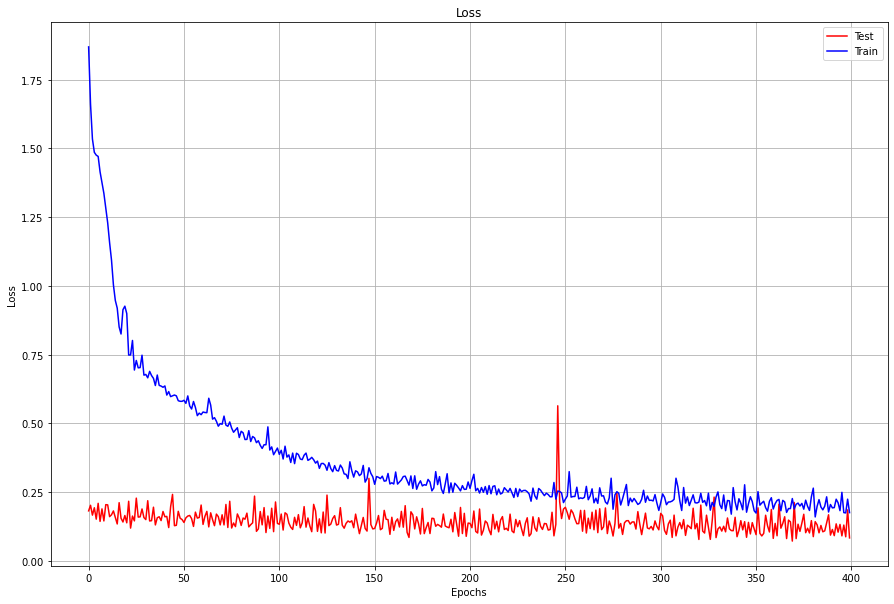

In [7]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics['loss_ls'], statistics_tst['loss_ls'], title)

In [8]:
statistics.keys()

dict_keys(['loss_ls', 'accuracy', 'correct', 'predict'])

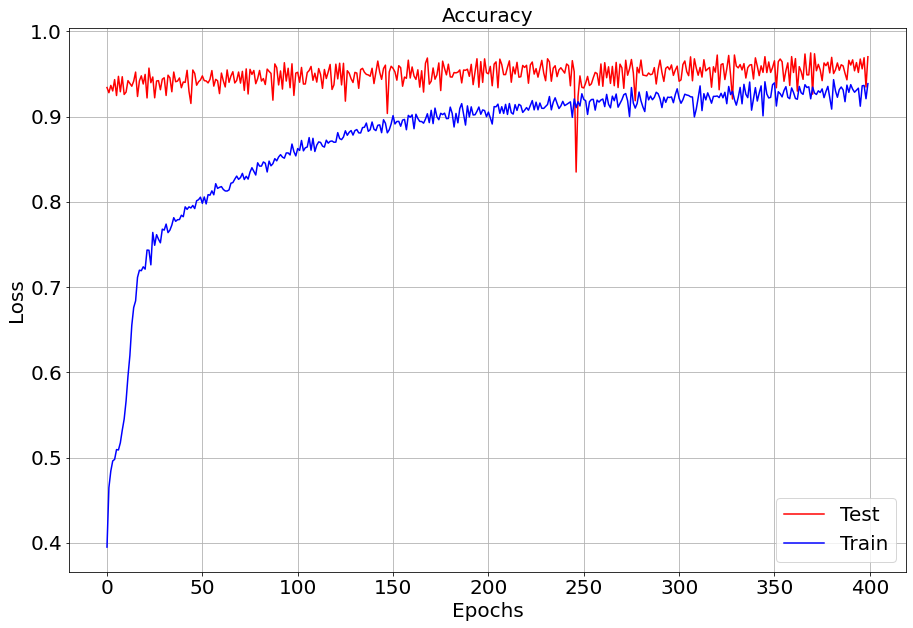

In [9]:
title_Acc = 'Accuracy'
Plot.Plot(statistics['accuracy'], statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.816710  0.034227  0.104459  0.000549  0.007937  0.005462   
1          0.004425  0.939108  0.002538  0.000057  0.000000  0.000129   
2          0.116797  0.009087  0.842863  0.001058  0.039683  0.007960   
3          0.013023  0.000332  0.006518  0.985993  0.000000  0.003988   
5          0.011507  0.012512  0.012219  0.000659  0.952381  0.977213   
9          0.029687  0.004333  0.024443  0.008550  0.000000  0.005121   
11         0.007852  0.000402  0.006960  0.003133  0.000000  0.000127   

Predicted        6         7     8         9         10        11  
Actual                                                             
0          0.127660  0.271152  0.00  0.002909  0.031915  0.038620  
1          0.106383  0.168531  0.10  0.000020  0.005319  0.000821  
2          0.170213  0.175375  0.10  0.001

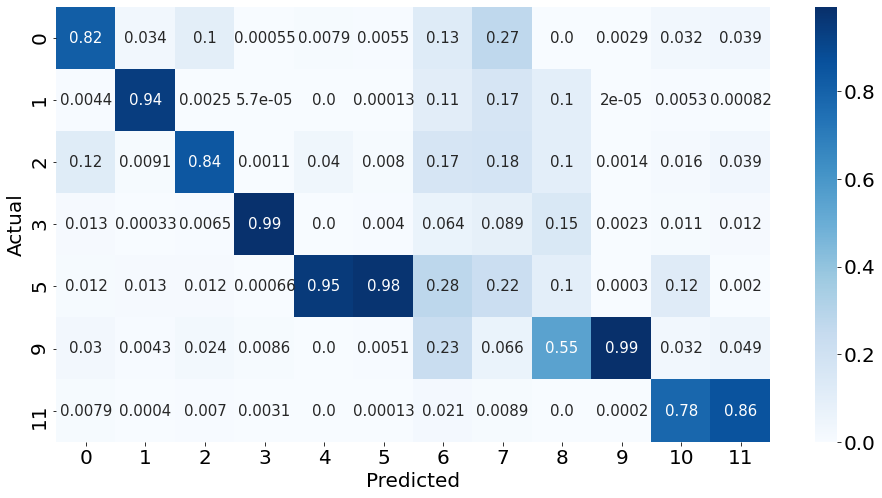

In [10]:
save_name = 'Confusion_Matrix_Train'
color= 'Blues'
folder = 'dataset/'
Plot.Conf_Matrix(statistics['correct'], statistics['predict'], color, folder)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.921785  0.006822  0.060683  0.000154  0.000000  0.004525   
1          0.000125  0.988360  0.000093  0.000009  0.007299  0.000034   
2          0.063293  0.001644  0.927886  0.000131  0.014599  0.004343   
3          0.002495  0.000091  0.000726  0.997797  0.014599  0.001459   
5          0.001995  0.001746  0.001861  0.000255  0.948905  0.987770   
9          0.008420  0.001289  0.007269  0.001419  0.014599  0.001719   
11         0.001888  0.000050  0.001482  0.000234  0.000000  0.000150   

Predicted        6         7         8         9         10        11  
Actual                                                                 
0          0.155844  0.274669  0.000000  0.002759  0.076923  0.015483  
1          0.116883  0.046444  0.055556  0.000022  0.008547  0.000208  
2          0.220779  0.140

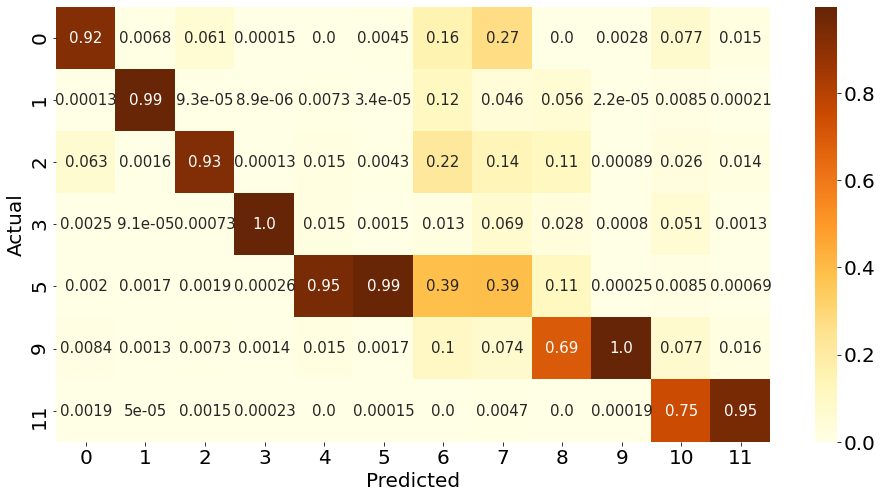

In [11]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder)